In [1]:
from itertools import combinations
from copy import deepcopy
import random
import time
from timeout_decorator import timeout
import matplotlib.pyplot as plt
import numpy as np

def unit_clauses(clauses):
    single_clauses=[]
    for cl in clauses:
        if(len(cl)==1):
            single_clauses.append(cl[0])
    return single_clauses

def unit_propagation(clauses, UC):
    C=[]
    for cl in clauses:
        C_=[]
        flag=False
        for li in cl:
            if li in UC:
                flag=True
                break
            if -li in UC:
                continue
            C_.append(li)
        if flag==False:
            C.append(C_)
    return C

def DPLL_procedure_random(clauses, assignment, literal_count, dpll_call):
    dpll_call[0]+=1
    if not clauses:
        return True
    if any(len(clause) == 0 for clause in clauses):
        return False

    # Unit Propagation
    unit_clauses_list = unit_clauses(clauses)
    for unit in unit_clauses_list:
        if(-unit in unit_clauses_list):
            return False
    if unit_clauses_list:
        new_list = unit_propagation(clauses, unit_clauses_list)
        for unit in unit_clauses_list:
            assignment[abs(unit)] = unit > 0
        return DPLL_procedure_random(new_list, assignment, literal_count, dpll_call)

    #take out the random literal from clauses
    row=random.randrange(len(clauses))
    column=random.randrange(len(clauses[row]))
    literal = abs(clauses[row][column])
    literal_count[0]=literal_count[0]+1
    assignment1 = deepcopy(assignment)

    # set the first literal to true
    assignment1[literal] = True
    new_list = unit_propagation(clauses, [literal])
    if DPLL_procedure_random(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    # if the first do not satisfy, set the literal to false
    assignment1 = deepcopy(assignment)
    assignment1[literal] = False
    new_list = unit_propagation(clauses, [-literal])
    if DPLL_procedure_random(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    return False
 
def DPLL_procedure_2clause(clauses, assignment, literal_count, dpll_call):
    dpll_call[0]+=1
    if not clauses:
        return True
    if any(len(clause) == 0 for clause in clauses):
        return False

    # Unit Propagation
    unit_clauses_list = unit_clauses(clauses)
    for unit in unit_clauses_list:
        if(-unit in unit_clauses_list):
            return False
    if unit_clauses_list:
        new_list = unit_propagation(clauses, unit_clauses_list)
        for unit in unit_clauses_list:
            assignment[abs(unit)] = unit > 0
        return DPLL_procedure_2clause(new_list, assignment, literal_count, dpll_call)

    #take out the max occured 2-clause literal from clauses
    dictc={}
    for clause in clauses:
        if(len(clause)==2):
            for i in range(2):
                if clause[i] not in dictc:
                    dictc[clause[i]]=1
                else:
                    dictc[clause[i]]=dictc[clause[i]]+1
    if(not bool(dictc)):
        row=random.randrange(len(clauses))
        column=random.randrange(len(clauses[row]))
        literal = abs(clauses[row][column])
    else:
        literal=abs(max(dictc, key = dictc.get))
    literal_count[0]=literal_count[0]+1
    assignment1 = deepcopy(assignment)

    # set the first literal to true
    assignment1[literal] = True
    new_list = unit_propagation(clauses, [literal])
    if DPLL_procedure_2clause(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    # if the first do not satisfy, set the literal to false
    assignment1 = deepcopy(assignment)
    assignment1[literal] = False
    new_list = unit_propagation(clauses, [-literal])
    if DPLL_procedure_2clause(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    return False

def DPLL_procedure_2and3clause(clauses, assignment, literal_count, dpll_call):
    dpll_call[0]+=1
    if not clauses:
        return True
    if any(len(clause) == 0 for clause in clauses):
        return False

    # Unit Propagation
    unit_clauses_list = unit_clauses(clauses)
    for unit in unit_clauses_list:
        if(-unit in unit_clauses_list):
            return False
    if unit_clauses_list:
        new_list = unit_propagation(clauses, unit_clauses_list)
        for unit in unit_clauses_list:
            assignment[abs(unit)] = unit > 0
        return DPLL_procedure_2clause(new_list, assignment, literal_count, dpll_call)

    #take out the max occured 2-clause literal from clauses
    dictc={}
    for clause in clauses:
        if(len(clause)==2 or len(clause)==3):
            for i in range(len(clause)):
                if clause[i] not in dictc:
                    dictc[clause[i]]=1
                else:
                    dictc[clause[i]]=dictc[clause[i]]+1
    if(not bool(dictc)):
        row=random.randrange(len(clauses))
        column=random.randrange(len(clauses[row]))
        literal = abs(clauses[row][column])
    else:
        literal=abs(max(dictc, key = dictc.get))
    literal_count[0]=literal_count[0]+1
    assignment1 = deepcopy(assignment)

    # set the first literal to true
    assignment1[literal] = True
    new_list = unit_propagation(clauses, [literal])
    if DPLL_procedure_2clause(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    # if the first do not satisfy, set the literal to false
    assignment1 = deepcopy(assignment)
    assignment1[literal] = False
    new_list = unit_propagation(clauses, [-literal])
    if DPLL_procedure_2clause(new_list, assignment1, literal_count, dpll_call):
        assignment.update(assignment1)
        return True

    return False

In [2]:
@timeout(60)
def func_random(clauses_n, assignment2, lit_count2,dpll_call2):
    result=DPLL_procedure_random(clauses_n, assignment2, lit_count2,dpll_call2)
    return result

@timeout(60)
def func_2cl(clauses_n, assignment3, lit_count3,dpll_call3):
    result = DPLL_procedure_2clause(clauses_n, assignment3, lit_count3,dpll_call3)
    return result

@timeout(60)
def func_2and3cl(clauses_n, assignment4, lit_count4, dpll_call4):
    result=DPLL_procedure_2and3clause(clauses_n, assignment4, lit_count4, dpll_call4)
    return result

In [3]:
import statistics
p=0.5
k=3
def random_weighted_letter():
    letters = {"-": p, "":p}
    return random.choices(population=list(letters.keys()), weights=letters.values())[0]

time_random=[]
time_2cl=[]
time_2and3cl=[]
p_satisfiablity=[]
l_random=[]
l_2cl=[]
l_2and3cl=[]
d_random=[]
d_2cl=[]
d_2and3cl=[]

for ratio in [float(j)/10 for j in range(30, 62, 2)]:
    elapsed_time_1l=[]
    elapsed_time_random=[]
    elapsed_time_2cl=[]
    elapsed_time_2and3cl=[]
    s_count1=0
    s_count2=0
    s_count3=0
    p_1l=0.0
    p_random=0.0
    p_2cl=0.0
    litcount_random=[]
    litcount_2cl=[]
    litcount_2and3cl=[]
    dpll_random=[]
    dpll_2cl=[]
    dpll_2and3cl=[]
    t=60
    for iterations in range(1,101):
        #l=number of clauses
        #n=number of variables
        N=150
        L=int(N*ratio)
        vars_n=[]
        for i in range(1,N+1):
            vars_n.append(i)

        clauses_n=[]
        for l in range(L):
            rand_list=random.sample(vars_n, 3)
            clause_exp=[int(f'{random_weighted_letter()}{rand_list[0]}'), int(f'{random_weighted_letter()}{rand_list[1]}'), int(f'{random_weighted_letter()}{rand_list[2]}') ]
            clauses_n.append(clause_exp)

        try:
            assignment2 = {}
            lit_count2=[0]
            dpll_call2=[0]
            st2 = time.time()
            result2=func_random(clauses_n, assignment2, lit_count2,dpll_call2)
            et2 = time.time()
            if(result2):
                s_count2+=1
            elapsed_time2 = et2 - st2
            elapsed_time_random.append(elapsed_time2)
            litcount_random.append(lit_count2[0])
            dpll_random.append(dpll_call2[0])
        except:
            elapsed_time_random.append(t)
#             litcount_random.append(lit_count2[0])
#             dpll_random.append(dpll_call2[0])

        try:
            assignment3 = {}
            lit_count3=[0]
            dpll_call3=[0]
            st3 = time.time()
            result3=func_2cl(clauses_n, assignment3, lit_count3,dpll_call3)
            et3 = time.time()
            if(result3):
                s_count3+=1
            elapsed_time3 = et3 - st3
            elapsed_time_2cl.append(elapsed_time3)
            litcount_2cl.append(lit_count3[0])
            dpll_2cl.append(dpll_call3[0])
        except:
            elapsed_time_2cl.append(t)
#             litcount_random.append(lit_count2[0])
#             dpll_random.append(dpll_call2[0])

        try:
            assignment4 = {}
            lit_count4=[0]
            dpll_call4=[0]
            st4 = time.time()
            result4=func_2and3cl(clauses_n, assignment4, lit_count4, dpll_call4)
            et4 = time.time()
            elapsed_time4 = et4 - st4
            elapsed_time_2and3cl.append(elapsed_time4)
            litcount_2and3cl.append(lit_count4[0])
            dpll_2and3cl.append(dpll_call4[0])
        except:
            elapsed_time_2and3cl.append(t)

    res2 = statistics.median(elapsed_time_random)
    res3 = statistics.median(elapsed_time_2cl)
    res4 = statistics.median(elapsed_time_2and3cl)
    if(res2==t):
        lit2=max(litcount_random)
    else:
        lit2 = statistics.median(litcount_random)
    if(res3==t):
        lit3=max(litcount_2cl)
    else:
        lit3 = statistics.median(litcount_2cl)
    if(res4==t):
        lit4=max(litcount_2and3cl)
    else:  
        lit4 = statistics.median(litcount_2and3cl)
    dpll2=statistics.median(dpll_random)
    dpll3=statistics.median(dpll_2cl)
    dpll4=statistics.median(dpll_2and3cl)
    print("Ratio(L/N) = ",ratio, ", Satisfiable Probability: ", s_count3/100)
    print("Median Time taken: t_random=" ,res2,",  t_2cl=", res3,", t_2and3cl=", res4 )
    print("Median Literal Runs : l_random=" ,lit2,",  l_2cl=", lit3,", l_2and3cl=", lit4 )
    print("Median DPLL calls : dpll_random=", dpll2, ", dpll_2cl=",dpll3, ", dpll_2and3cl=", dpll4)
    time_random.append(res2)
    time_2cl.append(res3)
    time_2and3cl.append(res4)
    p_satisfiablity.append((s_count3/100))
    l_random.append(lit2)
    l_2cl.append(lit3)
    l_2and3cl.append(lit4)
    d_random.append(dpll2)
    d_2cl.append(dpll3)
    d_2and3cl.append(dpll4)


Ratio(L/N) =  3.0 , Satisfiable Probability:  1.0
Median Time taken: t_random= 0.010278940200805664 ,  t_2cl= 0.004547595977783203 , t_2and3cl= 0.004551053047180176
Median Literal Runs : l_random= 41.0 ,  l_2cl= 27.0 , l_2and3cl= 27.0
Median DPLL calls : dpll_random= 134.0 , dpll_2cl= 84.0 , dpll_2and3cl= 84.0
Ratio(L/N) =  3.2 , Satisfiable Probability:  1.0
Median Time taken: t_random= 0.04718029499053955 ,  t_2cl= 0.006211400032043457 , t_2and3cl= 0.006541132926940918
Median Literal Runs : l_random= 110.5 ,  l_2cl= 29.0 , l_2and3cl= 28.0
Median DPLL calls : dpll_random= 802.5 , dpll_2cl= 108.5 , dpll_2and3cl= 107.5
Ratio(L/N) =  3.4 , Satisfiable Probability:  1.0
Median Time taken: t_random= 0.12363052368164062 ,  t_2cl= 0.010768771171569824 , t_2and3cl= 0.01385033130645752
Median Literal Runs : l_random= 244.0 ,  l_2cl= 34.5 , l_2and3cl= 31.5
Median DPLL calls : dpll_random= 1876.0 , dpll_2cl= 173.0 , dpll_2and3cl= 149.5
Ratio(L/N) =  3.6 , Satisfiable Probability:  1.0
Median Tim

In [7]:
ratio_list=[float(j)/10 for j in range(30, 62, 2)]
ratio_list
d_2and3cl

[84.0,
 107.5,
 149.5,
 430.0,
 1058.5,
 4830.0,
 13061.5,
 15216.0,
 12007.0,
 8035.0,
 5384.0,
 4528.0,
 3177.5,
 2503.0,
 2078.5,
 1687.0]

In [ ]:
# dup_l_random=deepcopy(l_random)
# dup_d_random=deepcopy(d_random)

In [ ]:
# dup_d_random[8]=37500
# dup_l_random[8]=5100

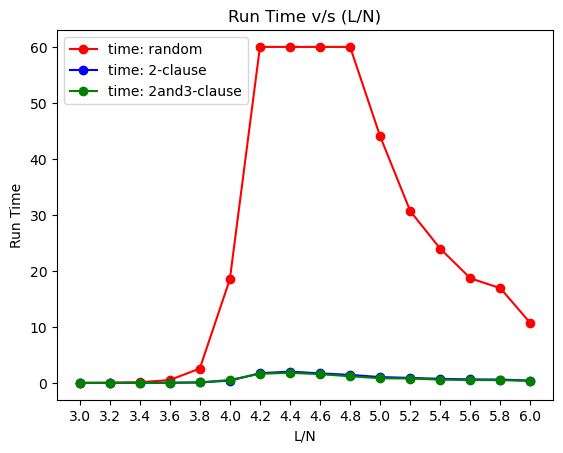

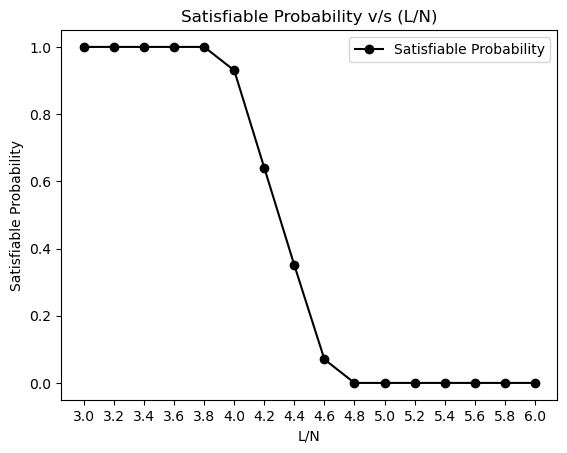

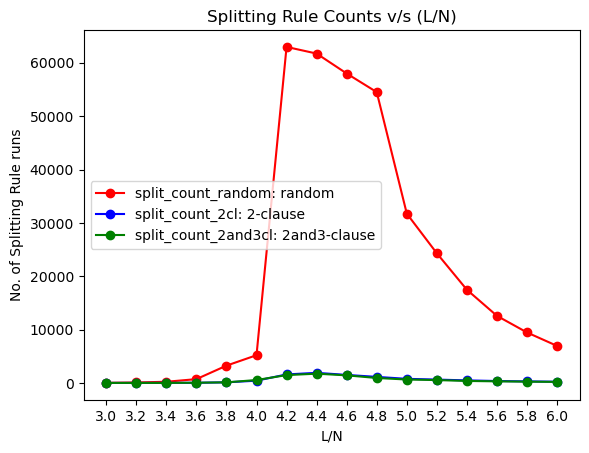

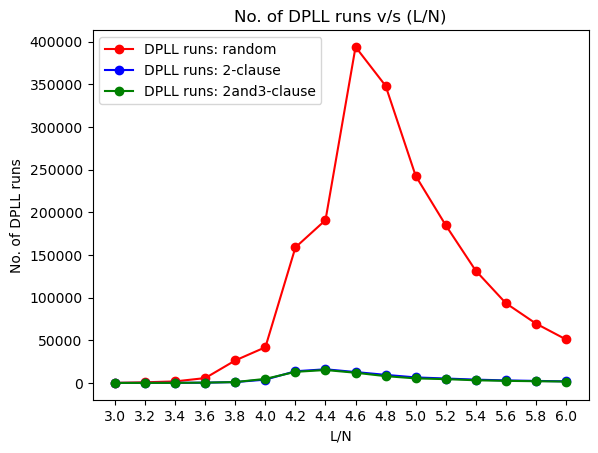

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# plot lines

fig1, ax1 = plt.subplots()
ax1.plot(ratio_list, time_random ,label = "time: random", color='red',marker='o', markerfacecolor='red')
ax1.plot(ratio_list, time_2cl ,label = "time: 2-clause",color='blue', marker='o', markerfacecolor='blue')
ax1.plot(ratio_list, time_2and3cl ,label = "time: 2and3-clause",color='green', marker='o', markerfacecolor='green')
ax1.set_title("Run Time v/s (L/N)")
ax1.set_xlabel("L/N")
ax1.set_ylabel("Run Time")
ax1.set_xticks(ratio_list, minor=False)
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(ratio_list, p_satisfiablity ,label = "Satisfiable Probability", color='black',marker='o', markerfacecolor='black')
ax2.set_title("Satisfiable Probability v/s (L/N)")
ax2.set_xlabel("L/N")
ax2.set_ylabel("Satisfiable Probability")
ax2.set_xticks(ratio_list, minor=False)
ax2.legend()

fig3, ax3 = plt.subplots()
ax3.plot(ratio_list, l_random ,label = "split_count_random: random", color='red',marker='o', markerfacecolor='red')
ax3.plot(ratio_list, l_2cl ,label = "split_count_2cl: 2-clause",color='blue', marker='o', markerfacecolor='blue')
ax3.plot(ratio_list, l_2and3cl ,label = "split_count_2and3cl: 2and3-clause",color='green', marker='o', markerfacecolor='green')
ax3.set_title("Splitting Rule Counts v/s (L/N)")
ax3.set_xlabel("L/N")
ax3.set_ylabel("No. of Splitting Rule runs")
ax3.set_xticks(ratio_list, minor=False)
ax3.legend()

fig4, ax4 = plt.subplots()
ax4.plot(ratio_list, d_random ,label = "DPLL runs: random", color='red',marker='o', markerfacecolor='red')
ax4.plot(ratio_list, d_2cl ,label = "DPLL runs: 2-clause",color='blue', marker='o', markerfacecolor='blue')
ax4.plot(ratio_list, d_2and3cl ,label = "DPLL runs: 2and3-clause",color='green', marker='o', markerfacecolor='green')
ax4.set_title("No. of DPLL runs v/s (L/N)")
ax4.set_xlabel("L/N")
ax4.set_ylabel("No. of DPLL runs")
ax4.set_xticks(ratio_list, minor=False)
ax4.legend()


In [9]:
# time_random/time_2and3cl
tr_random_to_my = [i / j for i, j in zip(time_random, time_2and3cl)]

In [10]:
tr_2cl_to_my=[i / j for i, j in zip(time_2cl, time_2and3cl)]

In [11]:
lr_2cl_to_my=[i / j for i, j in zip(l_2cl, l_2and3cl)]
lr_random_to_my=[i / j for i, j in zip(l_random, l_2and3cl)]

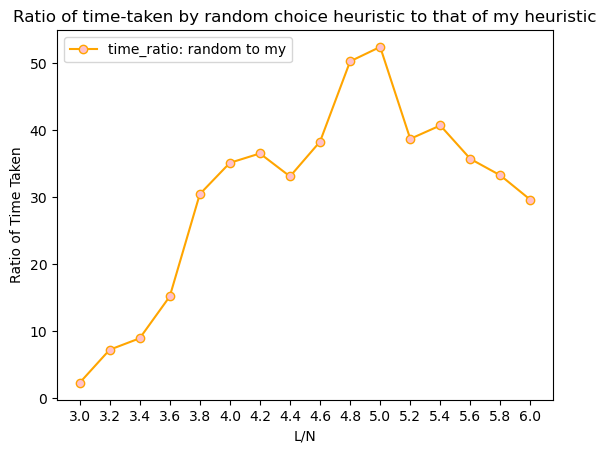

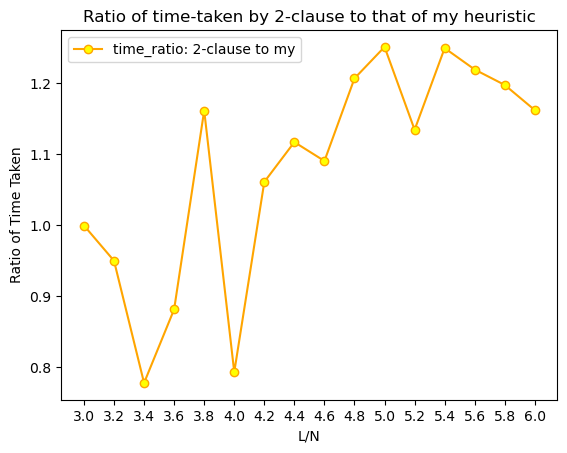

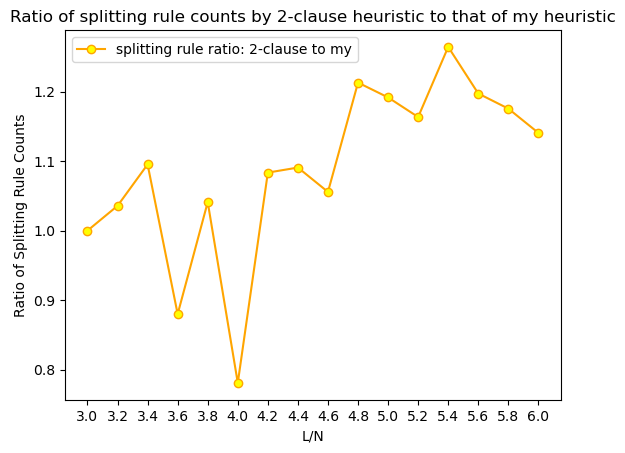

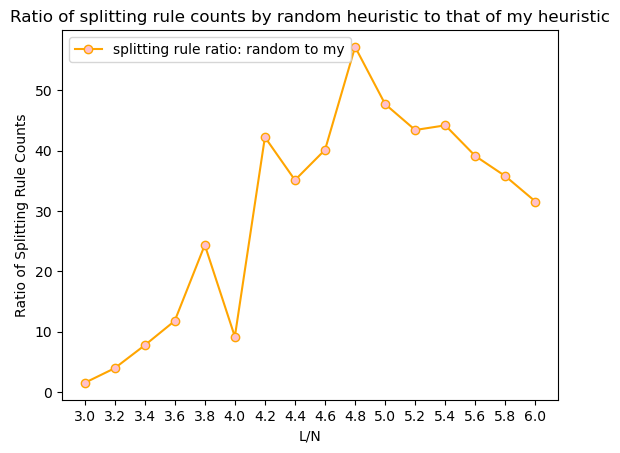

In [13]:
fig5, ax5 = plt.subplots()
ax5.plot(ratio_list, tr_random_to_my ,label = "time_ratio: random to my", color='orange',marker='o', markerfacecolor='pink')
ax5.set_title("Ratio of time-taken by random choice heuristic to that of my heuristic")
ax5.set_xlabel("L/N")
ax5.set_ylabel("Ratio of Time Taken")
ax5.set_xticks(ratio_list, minor=False)
ax5.legend()


fig7, ax7 = plt.subplots()
ax7.plot(ratio_list, tr_2cl_to_my ,label = "time_ratio: 2-clause to my",color='orange', marker='o', markerfacecolor='yellow')
ax7.set_title("Ratio of time-taken by 2-clause to that of my heuristic")
ax7.set_xlabel("L/N")
ax7.set_ylabel("Ratio of Time Taken")
ax7.set_xticks(ratio_list, minor=False)
ax7.legend()


fig6, ax6 = plt.subplots()
ax6.plot(ratio_list, lr_2cl_to_my ,label = "splitting rule ratio: 2-clause to my", color='orange', marker='o', markerfacecolor='yellow')
ax6.set_title("Ratio of splitting rule counts by 2-clause heuristic to that of my heuristic")
ax6.set_xlabel("L/N")
ax6.set_ylabel("Ratio of Splitting Rule Counts")
ax6.set_xticks(ratio_list, minor=False)
ax6.legend()

fig8, ax8 = plt.subplots()
ax8.plot(ratio_list, lr_random_to_my ,label = "splitting rule ratio: random to my", color='orange',marker='o', markerfacecolor='pink')
ax8.set_title("Ratio of splitting rule counts by random heuristic to that of my heuristic")
ax8.set_xlabel("L/N")
ax8.set_ylabel("Ratio of Splitting Rule Counts")
ax8.set_xticks(ratio_list, minor=False)
ax8.legend()

In [4]:
P_SAT=[1.0,1.0,1.0,1.0,1.0,0.93,0.64,0.35,0.07,0.03,0.0,0.0,0.0,0.0,0.0,0.0]